In [1]:
import altair as alt
import pandas as pd

In [2]:
df = pd.read_excel("Religious_Composition_by_Country_2010-2050.xlsx")

In [3]:
df.head()

,row_number,level,Nation_fk,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions
0,1,3,10000,2010,World,All Countries,"2,168,330,000","1,599,700,000","1,131,150,000","1,032,210,000","487,760,000","404,690,000","58,150,000","13,860,000","6,895,850,000"
1,2,2,1001,2010,North America,All Countries,"266,630,000","3,480,000","59,040,000","2,250,000","3,860,000","1,020,000","2,200,000","6,040,000","344,530,000"
2,3,2,1002,2010,Latin America-Caribbean,All Countries,"531,280,000","840,000","45,390,000","660,000","410,000","10,040,000","990,000","470,000","590,080,000"
3,4,2,1003,2010,Europe,All Countries,"553,280,000","43,470,000","139,890,000","1,380,000","1,350,000","870,000","890,000","1,420,000","742,550,000"
4,5,2,1004,2010,Middle East-North Africa,All Countries,"12,710,000","317,070,000","2,100,000","1,720,000","500,000","1,060,000","230,000","5,630,000","341,020,000"


In [4]:
df_countries = pd.read_csv("countrys.csv",  index_col=False, encoding='utf-8')

In [5]:
df_countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
data = pd.merge(df, df_countries, how='inner', left_on="Country", right_on='name')
data = data.append(df[df['Country'] == ' All Countries'])
data.drop(['country', 'name'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data.head()

,row_number,level,Nation_fk,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions,latitude,longitude
0,8,1,1,2010,Asia-Pacific,Afghanistan,30000,"31,330,000","<10,000","10,000","<10,000","<10,000","20,000","<10,000","31,410,000",33.93911,67.709953
1,249,1,1,2020,Asia-Pacific,Afghanistan,"40,000","40,610,000","<10,000","10,000","<10,000","<10,000","30,000","<10,000","40,720,000",33.93911,67.709953
2,490,1,1,2030,Asia-Pacific,Afghanistan,"50,000","51,030,000","10,000","20,000","10,000","<10,000","40,000","<10,000","51,170,000",33.93911,67.709953
3,731,1,1,2040,Asia-Pacific,Afghanistan,"60,000","61,700,000","10,000","20,000","10,000","<10,000","50,000","<10,000","61,860,000",33.93911,67.709953
4,972,1,1,2050,Asia-Pacific,Afghanistan,"70,000","72,190,000","20,000","30,000","20,000","<10,000","60,000","<10,000","72,380,000",33.93911,67.709953


In [8]:
religions = ["Christians","Muslims","Unaffiliated","Hindus","Buddhists","Folk Religions","Other Religions","Jews", "All Religions"]
transformed_data =  pd.DataFrame({(religion.replace(" ", "_") + "_Q"):data[religion].apply(lambda x: int(str(x).replace(",", "").replace(" ", "").replace("<", "").strip())) for religion in religions})
transformed_data.head()

,Christians_Q,Muslims_Q,Unaffiliated_Q,Hindus_Q,Buddhists_Q,Folk_Religions_Q,Other_Religions_Q,Jews_Q,All_Religions_Q
0,30000,31330000,10000,10000,10000,10000,20000,10000,31410000
1,40000,40610000,10000,10000,10000,10000,30000,10000,40720000
2,50000,51030000,10000,20000,10000,10000,40000,10000,51170000
3,60000,61700000,10000,20000,10000,10000,50000,10000,61860000
4,70000,72190000,20000,30000,20000,10000,60000,10000,72380000


In [9]:
data = pd.concat([data, transformed_data], axis=1)

In [10]:
data.head()

,row_number,level,Nation_fk,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,...,longitude,Christians_Q,Muslims_Q,Unaffiliated_Q,Hindus_Q,Buddhists_Q,Folk_Religions_Q,Other_Religions_Q,Jews_Q,All_Religions_Q
0,8,1,1,2010,Asia-Pacific,Afghanistan,30000,"31,330,000","<10,000","10,000",...,67.709953,30000,31330000,10000,10000,10000,10000,20000,10000,31410000
1,249,1,1,2020,Asia-Pacific,Afghanistan,"40,000","40,610,000","<10,000","10,000",...,67.709953,40000,40610000,10000,10000,10000,10000,30000,10000,40720000
2,490,1,1,2030,Asia-Pacific,Afghanistan,"50,000","51,030,000","10,000","20,000",...,67.709953,50000,51030000,10000,20000,10000,10000,40000,10000,51170000
3,731,1,1,2040,Asia-Pacific,Afghanistan,"60,000","61,700,000","10,000","20,000",...,67.709953,60000,61700000,10000,20000,10000,10000,50000,10000,61860000
4,972,1,1,2050,Asia-Pacific,Afghanistan,"70,000","72,190,000","20,000","30,000",...,67.709953,70000,72190000,20000,30000,20000,10000,60000,10000,72380000


In [11]:
data["dominant_religion"] = data[[religion.replace(" ", "_") + "_Q" for religion in religions if religion != 'All Religions']].idxmax(axis=1)

for i, row in data.iterrows():
    if data.loc[i][row["dominant_religion"]] == 10000:
        data.at[i, "dominant_religion"] = 'Undefined'

data["dominant_religion"] = data["dominant_religion"].apply(lambda x: x.replace("_"," ")[:-1].strip())
# data["dominant_religion"]

## Домінантну релігію у 2010 році за країнами світу

In [12]:
selection = alt.selection_multi(fields=['dominant_religion'])
color = alt.condition(selection, 
                      alt.Color('dominant_religion:N', legend=None),
                      alt.value('lightgray'))

data2010 = data[(data['Year'] == 2010) & data['latitude'].notna()]
                
scatter = alt.Chart(data2010, title="Dominant religion by country in 2010").transform_calculate(
    log_size = 'log(datum.All_Religions_Q)/log(10)'
).mark_circle(filled=True, opacity=0.5).encode(
    alt.X('longitude' , scale=alt.Scale(domain=(-180, 180))),
    alt.Y('latitude'),
    size=alt.Size('log_size:Q', bin=alt.Bin(maxbins=10), legend=None
                 , scale=alt.Scale(type='log', 
                                   range = [100, 700])
                 
                 ),
    color=color,

    tooltip = [alt.Tooltip('Country:N')] + [alt.Tooltip('dominant_religion:N')] +
              [alt.Tooltip(f'{r}:N') for r in religions] 
).properties(height= 300 * 2, width= 450 * 2).interactive()

legend = alt.Chart(data2010).mark_point().encode(
    y=alt.Y('dominant_religion:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)
(scatter | legend)

alt.HConcatChart(...)

Добавив геогафічне розсташування, щоб можна було ще додатково подивитись де домінує певна релігія і щоб лекше можна було знайти країну яку ти хочеш подивитись.
Колір очевидно показує кластери
Розмір за кількістю населення показує доміннантну кількість людей на певній території

Америка, південня афкрика, Європа, австралія - Християнські
західна|центральна Азія, північна африка - мусульманські
cхідна Азія - індуїзм, буддизм, народні релігії

#### Різницю між кількістю християн у 2010 та 2050 роках за країнами світу

In [13]:
data2010 = data[(data['Year'] == 2010) & data['latitude'].notna()]
data2050 = data[(data['Year'] == 2050) & data['latitude'].notna()]

In [14]:
transform_data = data2010.set_index("Country").join(data2050.set_index("Country"), lsuffix='_10', rsuffix='_50')

In [15]:
transform_data.head()

,row_number_10,level_10,Nation_fk_10,Year_10,Region_10,Christians_10,Muslims_10,Unaffiliated_10,Hindus_10,Buddhists_10,...,Christians_Q_50,Muslims_Q_50,Unaffiliated_Q_50,Hindus_Q_50,Buddhists_Q_50,Folk_Religions_Q_50,Other_Religions_Q_50,Jews_Q_50,All_Religions_Q_50,dominant_religion_50
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8,1,1,2010,Asia-Pacific,30000,"31,330,000","<10,000","10,000","<10,000",...,70000,72190000,20000,30000,20000,10000,60000,10000,72380000,Muslims
Albania,9,1,2,2010,Europe,"580,000","2,570,000","50,000","<10,000","<10,000",...,380000,2420000,10000,10000,10000,10000,10000,10000,2810000,Muslims
Algeria,10,1,3,2010,Middle East-North Africa,"60,000","34,730,000","660,000","<10,000","<10,000",...,70000,45620000,850000,10000,10000,10000,10000,10000,46580000,Muslims
American Samoa,11,1,4,2010,Asia-Pacific,"50,000","<10,000","<10,000","<10,000","<10,000",...,60000,10000,10000,10000,10000,10000,10000,10000,60000,Christians
Andorra,12,1,5,2010,Europe,"70,000","<10,000","<10,000","<10,000","<10,000",...,90000,10000,10000,10000,10000,10000,10000,10000,100000,Christians


In [16]:
transform_data['persent_change'] = transform_data["Christians_Q_10"]/transform_data["All_Religions_Q_10"] - transform_data["Christians_Q_50"] / transform_data["All_Religions_Q_50"]
transform_data['persent_change'] = transform_data['persent_change'] * 100

In [17]:
transform_data['persent_change'].describe()

count    234.000000
mean       1.632075
std        7.233088
min      -33.333333
25%       -0.109746
50%        0.158008
75%        2.626139
max       50.000000
Name: persent_change, dtype: float64

<AxesSubplot:>

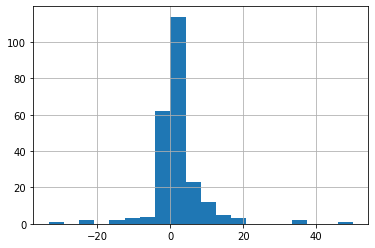

In [18]:
transform_data['persent_change'].hist(bins=20)

In [19]:
transform_data['Country'] = transform_data.index

In [20]:
brush = alt.selection(type='interval')

tf_d = transform_data['persent_change'].describe()
colours = ['#183BE8', '#18E82D', '#E82618']
color_scale = alt.Scale(
            domain=(tf_d['mean'] - 3 * tf_d['std'],
                    0,
                    tf_d['mean'] + 3 * tf_d['std']),
            range=[colours[0], colours[1], colours[2]]
        )

color = alt.condition(brush, 
                      alt.Color('persent_change:Q', scale=color_scale),
                      alt.value('lightgray'))
               
scatter = alt.Chart(transform_data, title="<Brush> Christian change from 2010 to 2050").transform_calculate(
    log_size = 'log(datum.All_Religions_Q_50)/log(10)'
).mark_circle(filled=True, opacity=0.5).encode(
    alt.X('longitude_50' , scale=alt.Scale(domain=(-180, 180))),
    alt.Y('latitude_50'),
    size=alt.Size('log_size:Q', bin=alt.Bin(maxbins=10), legend=None
                 , scale=alt.Scale(type='log', 
                                   range = [100, 700])
                 
                 ),
    color=color,

    tooltip = [alt.Tooltip('Country:N')] + [alt.Tooltip('dominant_religion_10:N')] + [alt.Tooltip('persent_change:Q')]
).add_selection(
    brush
).properties(height= 300 * 1.4, width= 450 * 1.4)

scatter_2 = alt.Chart(transform_data, title="<Focused> Christian change from 2010 to 2050").transform_calculate(
    log_size = 'log(datum.All_Religions_Q_50)/log(10)'
).mark_circle(filled=True, opacity=0.5).encode(
    alt.X('longitude_50' , scale=alt.Scale(domain=(-180, 180))),
    alt.Y('latitude_50'),
    size=alt.Size('log_size:Q', bin=alt.Bin(maxbins=10), legend=None
                 , scale=alt.Scale(type='log', 
                                   range = [100, 700])
                 
                 ),
    color=color,

    tooltip = [alt.Tooltip('Country:N')] + [alt.Tooltip('dominant_religion_10:N')] + [alt.Tooltip('persent_change:Q')]+ [alt.Tooltip('All_Religions_Q_50:Q')]
).transform_filter(
    brush
).interactive()

change_bars = alt.Chart(transform_data).mark_bar().encode(
    alt.X("persent_change:Q", bin=True),
    y='count()',
    color='dominant_religion_10:N',
).transform_filter(
    brush
).properties(height= 300 * 1.4, width= 450 * 1.4)


bars = alt.Chart(transform_data).mark_bar().encode(
    y='dominant_religion_10:N',
    color='dominant_religion_10:N',
    x='count(dominant_religion_10):Q'
).transform_filter(
    brush
)





(scatter | scatter_2) & (change_bars | bars)

alt.VConcatChart(...)

Різницю між кількістю християн у 2010 та 2050 роках за країнами світу.

Невдало вибрав кольори. Зелений зливається з синім.

Так як з першого графіка я зрозумів, розподіл релігій по країнам. 
Тому вирішив вибрати даний селектор, щоб можна було подивитись, як домінантна релігія впливає на зміну відсотку християн, через сорок років (Мойсей встиг щось за 40 років зробити=))
Гістограми на мою думку непогано на розподіл зміни, і яка релігія домінує в цьому регіоні.

По загальній карті досить непогано видно outliers.

В районі Північної Африки( bottom_right (-40,20) - bottom_left(0, 60) видно, що домінуючо мусульманська релігія негативно впливає на збільшення християн
В районі Східної Азії( bottom_right (90,35) - bottom_left(160, -10) видно, що будизм і місцеві релігії негативно впливає на збільшення християн


#### Кількість<Частку> людей, не афілійованих з жодною релігією у 2010 році за країнами світу

In [21]:
df = pd.read_excel("Religious_Composition_by_Country_2010-2050.xlsx", sheet_name="rounded_percentage")
data = pd.merge(df, df_countries, how='inner', left_on="Country", right_on='name')
data = data.append(df[df['Country'] == ' All Countries'])
data.drop(['country', 'name'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

data2010 = data[data['Year'] == 2010]

In [22]:
data2010.dropna(inplace=True)

D:\ProgramingTools\Anaconda\envs\andriy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data2010

,row_number,level,Nation_fk,Year,Region,Country,All Religions,Buddhists,Christians,Folk Religions,Hindus,Jews,Muslims,Other Religions,Unaffiliated,latitude,longitude
0,8,1,1,2010,Asia-Pacific,Afghanistan,100,< 1.0,< 1.0,< 1.0,< 1.0,< 1.0,>99.0,< 1.0,< 1.0,33.939110,67.709953
5,9,1,2,2010,Europe,Albania,100,< 1.0,18.0,< 1.0,< 1.0,< 1.0,80.3,< 1.0,1.4,41.153332,20.168331
10,10,1,3,2010,Middle East-North Africa,Algeria,100,< 1.0,< 1.0,< 1.0,< 1.0,< 1.0,97.9,< 1.0,1.8,28.033886,1.659626
15,11,1,4,2010,Asia-Pacific,American Samoa,100,< 1.0,98.3,< 1.0,< 1.0,< 1.0,< 1.0,< 1.0,< 1.0,-14.270972,-170.132217
20,12,1,5,2010,Europe,Andorra,100,< 1.0,89.5,< 1.0,< 1.0,< 1.0,< 1.0,< 1.0,8.8,42.546245,1.601554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,237,1,232,2010,Sub-Saharan Africa,Zimbabwe,100,< 1.0,87.0,3.8,< 1.0,< 1.0,< 1.0,< 1.0,7.9,-19.015438,29.154857
1150,238,1,237,2010,Sub-Saharan Africa,South Sudan,100,< 1.0,60.5,32.9,< 1.0,< 1.0,6.2,< 1.0,< 1.0,7.766098,20.649194
1155,239,1,238,2010,Latin America-Caribbean,Curacao,100,< 1.0,93.9,1.2,< 1.0,< 1.0,< 1.0,< 1.0,3.3,12.207733,-69.493483
1160,240,1,239,2010,Latin America-Caribbean,Sint Maarten,100,< 1.0,93.9,1.2,< 1.0,< 1.0,< 1.0,< 1.0,3.3,18.026723,-63.088630


In [24]:
data2010['Unaffiliated_Q'] = data2010['Unaffiliated'].apply(lambda x: float(str(x).replace(",", "").replace(" ", "").replace("<", "").replace(">", "").strip()))
data2010['Muslims_Q'] = data2010['Muslims'].apply(lambda x: float(str(x).replace(",", "").replace(" ", "").replace("<", "").replace(">", "").strip()))

D:\ProgramingTools\Anaconda\envs\andriy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramingTools\Anaconda\envs\andriy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
brush_un = alt.selection(type='interval')
scatter_un = alt.Chart(data2010, title="Unaffiliated in 2010").transform_calculate().mark_circle(filled=True, opacity=0.5).encode(
    alt.X('longitude' , scale=alt.Scale(domain=(-180, 180))),
    alt.Y('latitude'),
    color='Unaffiliated_Q',
    tooltip = [alt.Tooltip('Country:N'), alt.Tooltip('Unaffiliated:N')]
).add_selection(
    brush_un
).properties(height= 300 * 1.2, width= 450 * 1.2)

persent_bars_un = alt.Chart(data2010).mark_bar().encode(
    alt.X("Unaffiliated_Q:Q", bin=True, scale=alt.Scale(domain=(0, 100))),
    y='count()',
).transform_filter(
    brush_un
).properties(height= 300 * 1.2, width= 450 * 1.2)


brush_mus = alt.selection(type='interval')
scatter_mus = alt.Chart(data2010, title="Muslims in 2010").transform_calculate().mark_circle(filled=True, opacity=0.5).encode(
    alt.X('longitude' , scale=alt.Scale(domain=(-180, 180))),
    alt.Y('latitude'),
    color=alt.Color('Muslims_Q',legend=alt.Legend(title="Persent of \"religion\"")),
    tooltip = [alt.Tooltip('Country:N'), alt.Tooltip('Muslims:N')]
).add_selection(
    brush_mus
).properties(height= 300 * 1.2, width= 450 * 1.2)

persent_bars_mus = alt.Chart(data2010).mark_bar().encode(
    alt.X("Muslims_Q:Q", bin=True, scale=alt.Scale(domain=(0, 100))),
    y='count()',
).transform_filter(
    brush_mus
).properties(height= 300 * 1.2, width= 450 * 1.2)


In [26]:
(scatter_un | scatter_mus) & (persent_bars_un | persent_bars_mus)

alt.VConcatChart(...)

Мусульманські країни виглядають досить "бінарними". Їхня релігія є досить агресивною(країни з відсотком > 90)
неафілійовані країни виглядають досить "пасивними".